In [0]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import os
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv("/content/drive/My Drive/GreatlakesAIML/Bank_Personal_Loan_Modelling-1.csv")

In [4]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [6]:
data.shape

(5000, 14)

In [7]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [13]:
data.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


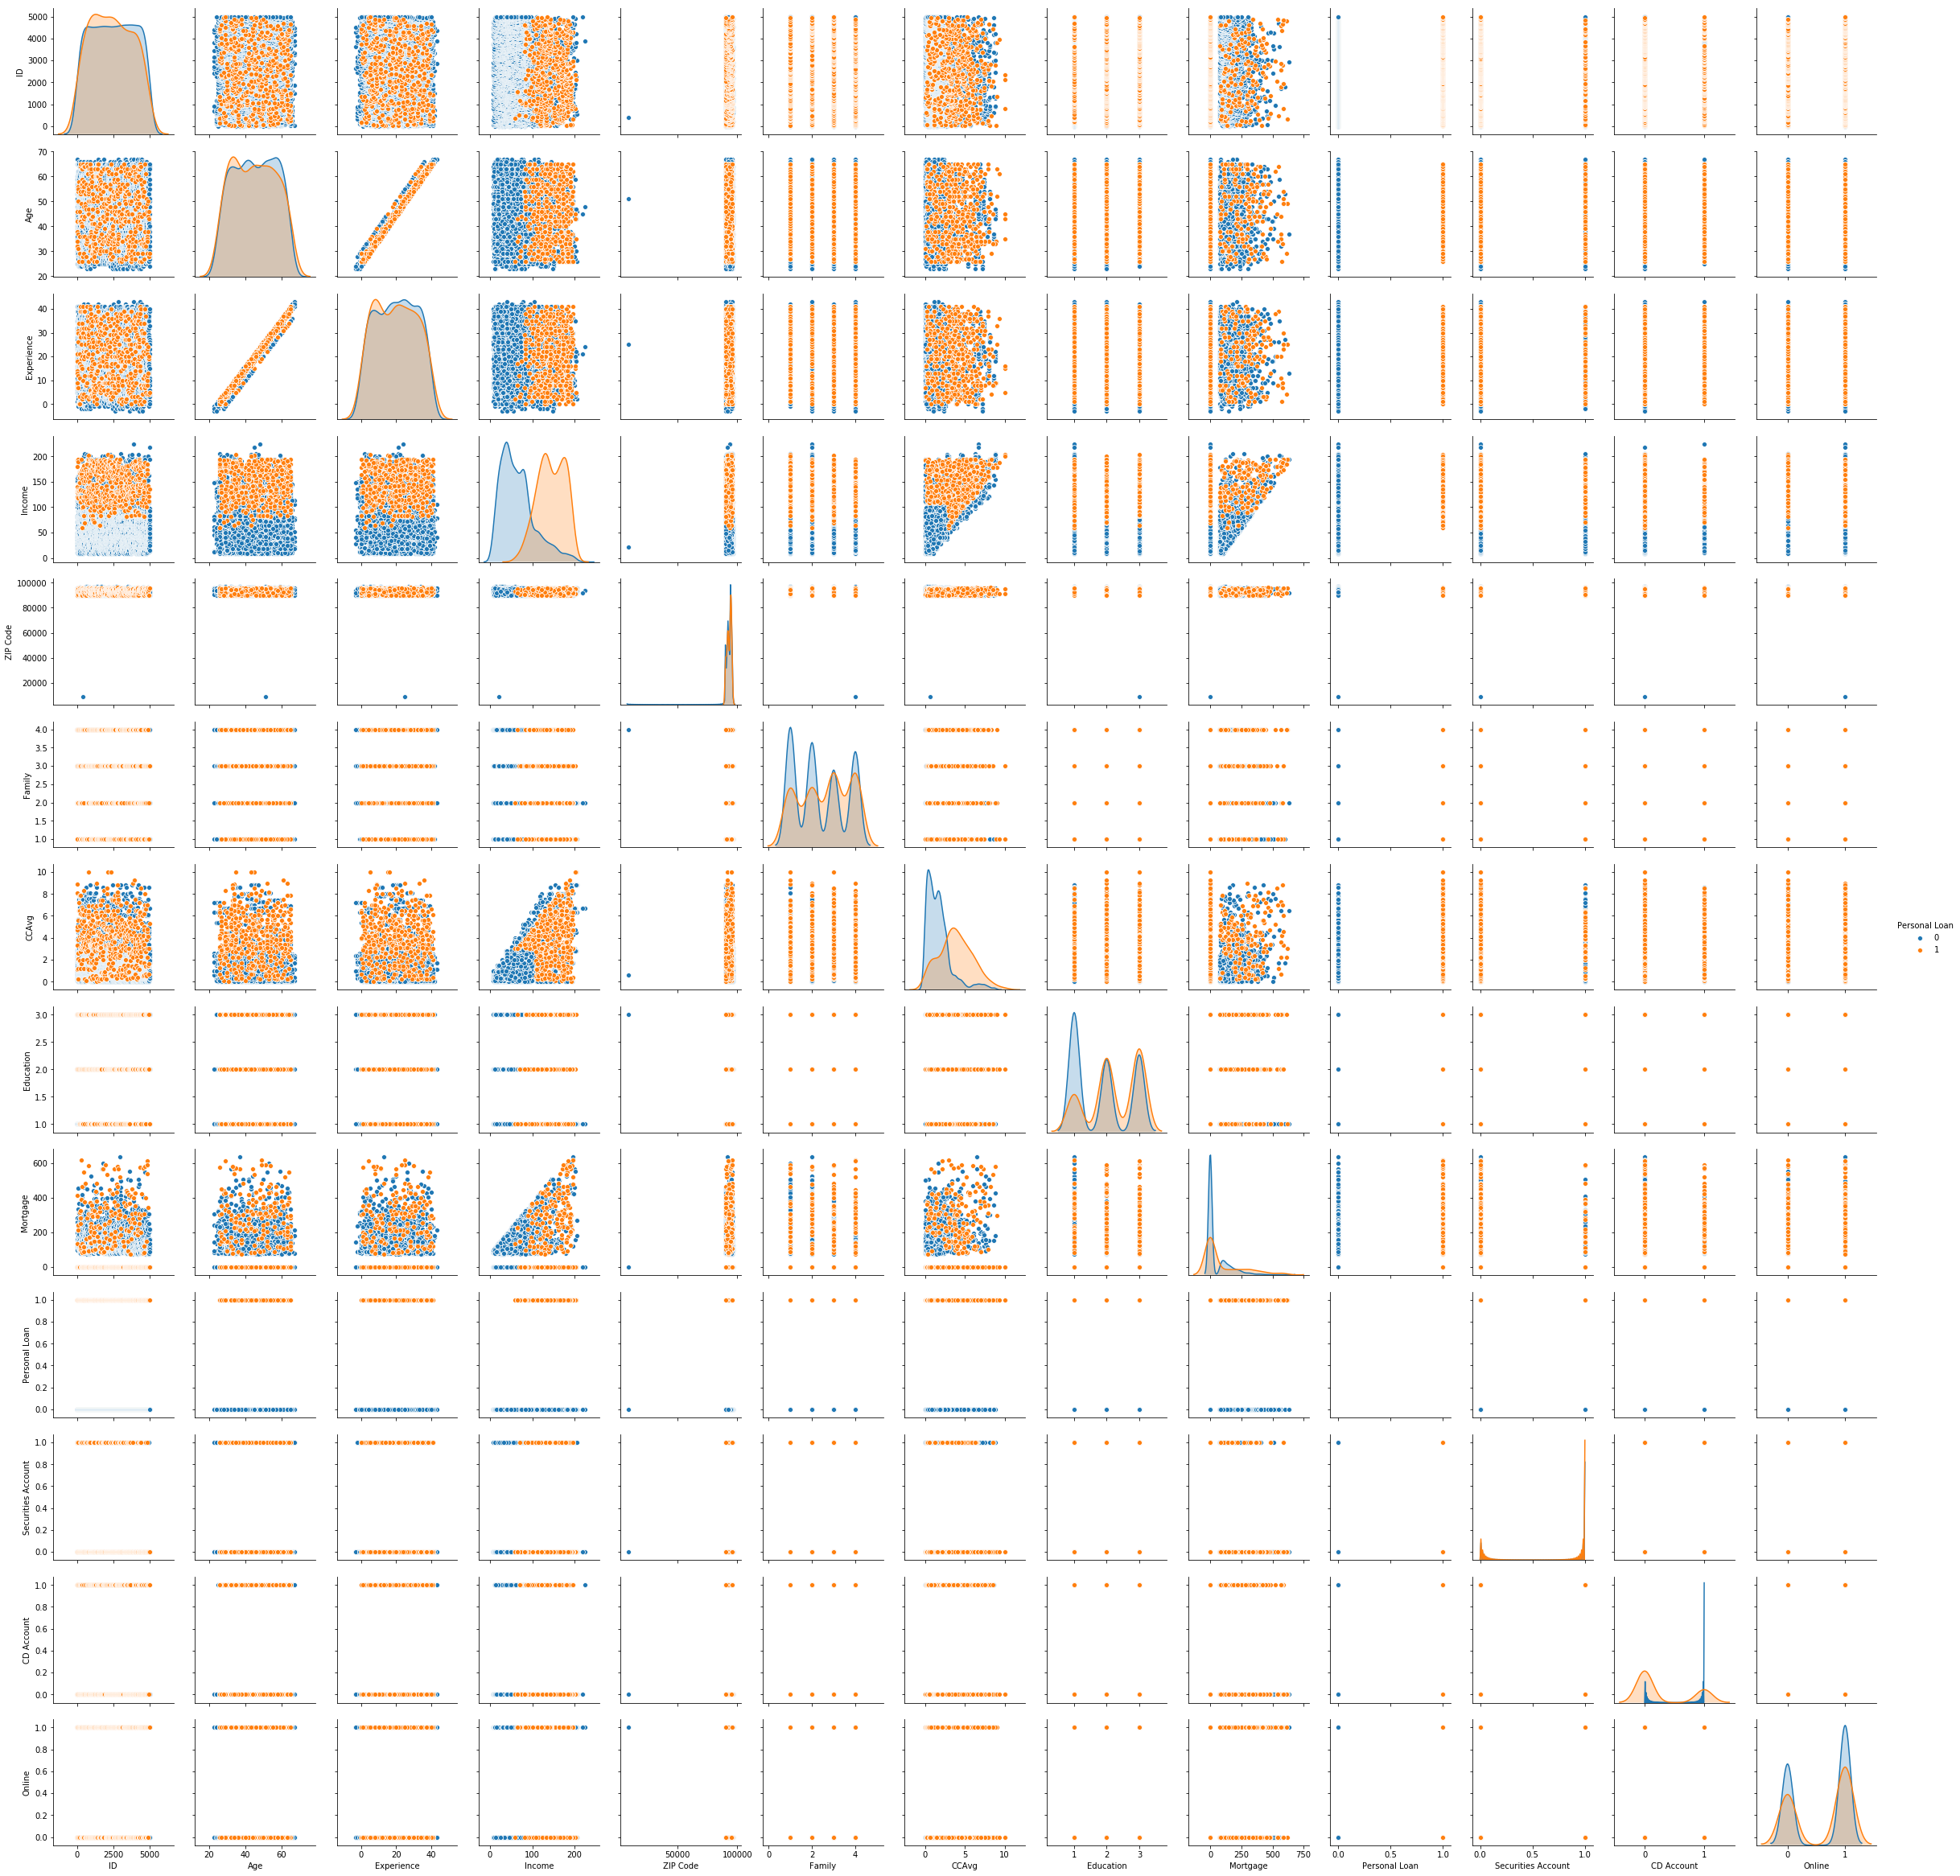

In [12]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
data_attr = data.iloc[:,0:13]
sns.pairplot(data_attr, hue='Personal Loan')

In [0]:
# Those with less credit card spending take personal loans. 
#Personal loan takers is almost equal to level of education except highly educated have less people taking personal loans
#People with high mortgage are more likely to personal loans. 
#people with CD account take personal loans
#Age & experience have no effect on 

In [16]:
datacopy=data.copy()
datacopy.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [0]:
data = data.drop('ID', axis=1)
data = data.drop('ZIP Code', axis=1)
data = data.drop('Securities Account', axis=1)
data = data.drop('Online', axis=1)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
Age              5000 non-null int64
Experience       5000 non-null int64
Income           5000 non-null int64
Family           5000 non-null int64
CCAvg            5000 non-null float64
Education        5000 non-null int64
Mortgage         5000 non-null int64
Personal Loan    5000 non-null int64
CD Account       5000 non-null int64
CreditCard       5000 non-null int64
dtypes: float64(1), int64(9)
memory usage: 390.7 KB


In [19]:
x=data.drop('Personal Loan',axis=1)
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,CD Account,CreditCard
0,25,1,49,4,1.6,1,0,0,0
1,45,19,34,3,1.5,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0
3,35,9,100,1,2.7,2,0,0,0
4,35,8,45,4,1.0,2,0,0,1


In [21]:
y=data[['Personal Loan']]
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [0]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [0]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [24]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
y_pred1=pd.DataFrame(y_pred)

In [0]:
data_c = pd.concat([y_pred1.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

In [29]:
data_c

,0,Personal Loan
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [30]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[1341    4]
 [  58   97]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1345
           1       0.96      0.63      0.76       155

    accuracy                           0.96      1500
   macro avg       0.96      0.81      0.87      1500
weighted avg       0.96      0.96      0.95      1500



In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9586666666666667

In [0]:
data=datacopy.copy()

In [91]:
#KNN 
## Target Variable Frequency Distribution
freq = data['Personal Loan'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
freq

,Personal Loan,count,prop
0,0,4520,0.904
1,1,480,0.096


In [0]:
## Creating the K Nearest Neighbour Classifier Object
## weights options are 'uniform' 'distance'
## weights = 'distance' - weighs points by inverse of their distance
NNH = KNeighborsClassifier(n_neighbors = 21, weights = 'uniform', 
                           metric = 'euclidean')

In [93]:
x=data.drop('Personal Loan',axis=1)
x.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [94]:
y=data[['Personal Loan']]
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [0]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [96]:
## scaling all variables
x_z = x.apply(zscore)
x.shape

(5000, 13)

In [97]:
x_z.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.731704,-1.774417,-1.666078,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
1,-1.731012,-0.029524,-0.096330,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
2,-1.730319,-0.552992,-0.445163,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
3,-1.729626,-0.901970,-0.968413,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
4,-1.728933,-0.901970,-1.055621,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,1.549632


In [98]:
## Store the normalized features data into np array
X_train = np.array(x_z)
X_train.shape

(5000, 13)

In [99]:
X_train

array([[-1.73170443, -1.77441684, -1.66607847, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-1.73101161, -0.02952359, -0.09633022, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-1.73031879, -0.55299157, -0.44516316, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.73031879,  1.54088033,  1.64783451, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.73101161,  1.71536965,  1.73504275, ..., -0.25354028,
         0.82195086, -0.64531434],
       [ 1.73170443, -1.51268285, -1.40445376, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [100]:
## Capture the target variable into a pandas series akin to array
y_train = y.copy()
y_train

,Personal Loan
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [101]:
## Fit the model
NNH.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [0]:
data['prob'] = pd.DataFrame(NNH.predict_proba(X_train))[1]

In [104]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,prob
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0.000000
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0.000000
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0.000000
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.142857
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.000000


In [105]:
## Model Performance Measure
## Deciling
data['decile']=pd.qcut(data.prob.rank(method='first'), 10, labels=False)

## Rank Order Table and KS Statistics
def Response_Rate(X,y,Target):
    
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_prob","max_prob","avg_prob",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank=Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"]=round(Rank["cnt_resp"]*100/Rank["cnt"],2)
    Rank
    return(Rank)


RRate = Response_Rate(data,"prob","Personal Loan")
RRate

,decile,min_prob,max_prob,avg_prob,cnt,cnt_resp,cnt_non_resp,rrate
9,9,0.190476,1.000000,0.518667,500.0,397.0,103.0,79.4
8,8,0.095238,0.190476,0.126476,500.0,70.0,430.0,14.0
7,7,0.047619,0.095238,0.050476,500.0,12.0,488.0,2.4
6,6,0.000000,0.047619,0.011143,500.0,1.0,499.0,0.2
5,5,0.000000,0.000000,0.000000,500.0,0.0,500.0,0.0
4,4,0.000000,0.000000,0.000000,500.0,0.0,500.0,0.0
3,3,0.000000,0.000000,0.000000,500.0,0.0,500.0,0.0
2,2,0.000000,0.000000,0.000000,500.0,0.0,500.0,0.0
1,1,0.000000,0.000000,0.000000,500.0,0.0,500.0,0.0
0,0,0.000000,0.000000,0.000000,500.0,0.0,500.0,0.0


In [106]:
# Compute and print AUC score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(data["Personal Loan"],data["prob"])
auc

0.9842519358407079

In [107]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[1259   91]
 [ 140   10]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1350
           1       0.10      0.07      0.08       150

    accuracy                           0.85      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.82      0.85      0.83      1500



BAYES Naives

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
df=datacopy.copy()

In [121]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [0]:
df = df.drop('ID', axis=1)
df = df.drop('ZIP Code', axis=1)
df = df.drop('Securities Account', axis=1)
df = df.drop('Online', axis=1)

In [123]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.06040,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.23825,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

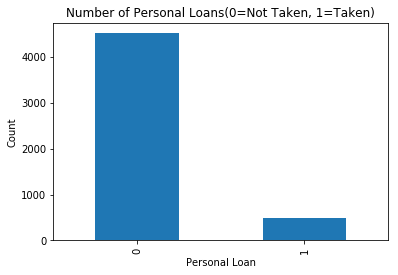

In [125]:
plt.figure()
pd.Series(df['Personal Loan']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Personal Loan")
plt.title('Number of Personal Loans(0=Not Taken, 1=Taken)');

In [0]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [127]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,22.338400,23.104600,53.323200,1.396400,24.028600,0.881000,31.851400,0.096000,0.06040,0.294000
std,11.463166,11.467954,36.837613,1.147663,22.231838,0.839869,67.252601,0.294621,0.23825,0.455637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,12.000000,13.000000,25.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,22.000000,23.000000,46.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,32.000000,33.000000,72.000000,2.000000,31.000000,2.000000,27.000000,0.000000,0.00000,1.000000
max,44.000000,46.000000,161.000000,3.000000,107.000000,2.000000,346.000000,1.000000,1.00000,1.000000


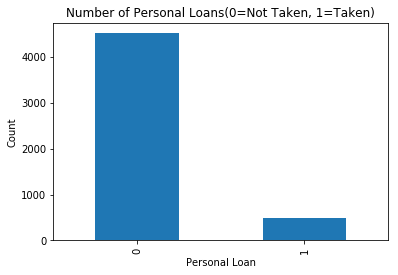

In [128]:
plt.figure()
pd.Series(df['Personal Loan']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Personal Loan")
plt.title('Number of Personal Loans(0=Not Taken, 1=Taken)');

In [0]:
X=df.drop(['Personal Loan'], axis=1)
Y=df['Personal Loan']

In [0]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3)

In [0]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, Y_train)

In [0]:
y_pred_GNB=clf_GNB.predict(X_test)

In [136]:
y_pred_GNB

array([0, 0, 0, ..., 0, 0, 0])

In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred_GNB)

0.882

In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred_GNB)
print(confusion_matrix)

[[1233  108]
 [  69   90]]


Accuracy is best with KNN i.e. 98.4%